Name: Chistopher Aldora Tjitrabudi  
E-mail: christopher.at99@gmail.com  

-----

This notebook contained 20 questions and answers for DQLab Data Champion Role: Data Analyst.

# Table of Content

- [Table of Content](#Table-of-Content)
- [Question for No. 1-3](#Question-for-No.-1-3)
  * [Data Cleaning](#Data-Cleaning)
  * [Answer for Question No. 1](#Answer-for-Question-No.-1)
  * [Answer for Question No. 2](#Answer-for-Question-No.-2)
  * [Answer for Question No. 3](#Answer-for-Question-No.-3)
- [Question for No. 4-5](#Question-for-No.-4-5)
  * [Answer for Question No. 4](#Answer-for-Question-No.-4)
  * [Answer for Question No. 5](#Answer-for-Question-No.-5)
- [Question for No. 6-10](#Question-for-No.-6-10)
  * [Answer for Question No. 6](#Answer-for-Question-No.-6)
  * [Answer for Question No. 7](#Answer-for-Question-No.-7)
  * [Answer for Question No. 8](#Answer-for-Question-No.-8)
  * [Answer for Question No. 9](#Answer-for-Question-No.-9)
  * [Answer for Question No. 10](#Answer-for-Question-No.-10)
- [Question for No. 11-13](#Question-for-No.-11-13)
  * [Answer for Question No. 11](#Answer-for-Question-No.-11)
  * [Answer for Question No. 12](#Answer-for-Question-No.-12)
  * [Answer for Question No. 13](#Answer-for-Question-No.-13)
- [Question for No. 14-15](#Question-for-No.-14-15)
  * [Data Cleaning and Analysis](#Data-Cleaning-and-Analysis)
  * [Answer for Question No. 14](#Answer-for-Question-No.-14)
  * [Answer for Question No. 15](#Answer-for-Question-No.-15)
- [Question for 16 - 17](#Question-for-No.-16-17)
  * [Data Analysis](#Data-Analysis)
  * [Answer for Question No. 16](#Answer-for-Question-No.-16)
  * [Answer for Question No. 17](#Answer-for-Question-No.-17)
- [Question for No. 18-20](#Question-for-No.-18-20)
  * [Answer for Question No. 18](#Answer-for-Question-No.-18)
  * [Answer for Question No. 19](#Answer-for-Question-No.-19)
  * [Answer for Question No. 20](#Answer-for-Question-No.-10)

The following code is used to import all the necessary library into our notebook.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats         # Used in Q6-8
import statsmodels.stats.api as sms # Used to find confidence interval
import matplotlib.pyplot as plt # For plotting
import seaborn as sns           # For plotting aestheticaly
from matplotlib import rc       
%matplotlib inline

# Question for No. 1-3
You are to write SQL statements to answer the following questions, using the 2 tables user_datasets tab and order_datasets tab. Sample data is present in the respectively named sheets. (100 marks)  

1. Write a SQL statement to count the number of orders per country !
2. Write a SQL statement to find the number of users who made their first order in each country, each day
3. Write a SQL statement to find the first order GMV of each user. If there is a tie, use the order with the lower orderid 

## Data Cleaning

Before answering those question, we will do some cleaning and importing csv into database.
`user_datasets` consisted of 10,855 rows and `order_datasets` consisted of 30,041 rows. Those sheets are copied into separate csv files.  
First, we need to change the date format into YYYY-MM-DD. We will read `user_datasets.csv` and `order_datasets.csv`, change the date format, and then import those files into database.

In [2]:
user_data  = pd.read_csv('sql\\user_datasets.csv')
order_data = pd.read_csv('sql\\order_datasets.csv')

# user_datasets header
user_data.head()

,userid,register_time,country
0,10310,02/03/17,TW
1,10313,20/03/17,SG
2,10323,26/03/17,TW
3,10330,02/05/17,VN
4,10333,10/01/17,TH


In [3]:
# order_datasets header
order_data.head()

,orderid,userid,itemid,gmv,order_time
0,1030132,64177,3366770,"27,0",24/04/17
1,1030137,10475,6130641,"69,0",02/02/17
2,1030147,28286,6770063,"87,0",25/04/17
3,1030153,28282,4193426,"82,0",11/05/17
4,1030155,64970,8825994,"29,0",07/03/17


In [4]:
# Change date format from DD/MM/YYYY to YYYY-MM-DD
new_date = user_data['register_time'].str.slice(0,6)+'2017' # Add 2000 to the year value
new_date = pd.to_datetime(new_date,dayfirst=True)           # Transform new_date into datetime YYYY-MM-DD
user_data['register_time'] = new_date                       # Insert new_date back into register_time column

new_date = order_data['order_time'].str.slice(0,6)+'2017' # Add 2000 to the year value
new_date = pd.to_datetime(new_date,dayfirst=True)         # Transform new_date into datetime YYYY-MM-DD
order_data['order_time'] = new_date                       # Insert new_date back into order_time column

order_data['gmv'] = order_data['gmv'].str.replace(',','.') # Replace comma with period

# Export user_data and order_data into new csv
user_data.to_csv(path_or_buf='sql\\user_datasets_new.csv',header=False,index =False)
order_data.to_csv(path_or_buf='sql\\order_datasets_new.csv',header=False,index =False)

In [5]:
# New user_datasets header
user_data.head()

,userid,register_time,country
0,10310,2017-03-02,TW
1,10313,2017-03-20,SG
2,10323,2017-03-26,TW
3,10330,2017-05-02,VN
4,10333,2017-01-10,TH


In [6]:
# New order_datasets header
order_data.head()

,orderid,userid,itemid,gmv,order_time
0,1030132,64177,3366770,27.0,2017-04-24
1,1030137,10475,6130641,69.0,2017-02-02
2,1030147,28286,6770063,87.0,2017-04-25
3,1030153,28282,4193426,82.0,2017-05-11
4,1030155,64970,8825994,29.0,2017-03-07


We are done cleaning `user_datasets` and `order_datasets`. 
Now we will make database using those csv that is saved in the `sql` folder. We use MariaDB from XAMPP for question 1-5. We create a database and import `user_datasets_new.csv` and `order_datasets_new.csv` into tables. The database we made (including the table in Question 3-4) is exported as `sql\dqlab_database.sql`. This is the screenshot of the database.

![dqlab_database](img/dqlab_database.png "DQLab Database")

## Answer for Question No. 1
We're asked to count the number of orders per country. Every row/record on `order_datasets` are the orders we need to count. The country of the user can be found by combining `user_datasets` and `order_datasets` table. The `LEFT JOIN` clause is used to combine `user_datasets` table into `order_datasets` table on `userid` column. Group the data by the `country` column. Select only `country` column from `user_datasets` and use aggregate function `COUNT()` on `country`. The query based on those explaination looked like this:

```sql
SELECT user_datasets.country, COUNT(user_datasets.country) country_count FROM order_datasets
LEFT JOIN user_datasets ON user_datasets.userid = order_datasets.userid
GROUP BY country;
```
The result of the above query is shown below.
![Question_01](img/Question_01.png "Question 1")


## Answer for Question No. 2

We are asked to count the number of first order in each country and day. First, we select `country` and `order_time` column and group by those 2 columns. The we count the distinct `userid` column. We use the `DISTINCT` function to count only the first order of each user. The query is:

```sql
SELECT user_d.country, order_time, COUNT(DISTINCT(order_d.userid)) userid_count FROM order_datasets order_d
JOIN user_datasets user_d ON user_d.userid=order_d.userid
GROUP BY user_d.country, order_time
```

The result of this query contained 1064 rows of data. The entire table is saved as `Answer_for_Question_No_2.csv`. The first 10 rows of the result is:
![Question_02](img/Question_02.png "Question 2")


## Answer for Question No. 3

We are asked to find the first order GMV of each user. First, we find the first order_time of each user.

```sql
SELECT userid, min(order_time) min_order_time
FROM order_datasets
GROUP BY userid
```
The sample result (first 10 rows) of those query is:
![Question_03](img/Question_03-01.png "Question 3")

Next, we use the `min_order_time` to find if there are any duplicate.
```sql
SELECT count(userid) count_userid, order_time, min_order_time
FROM (SELECT userid, min(order_time) min_order_time, order_time, gmv
      FROM order_datasets
      GROUP BY userid
) t
GROUP BY userid
HAVING order_time=min_order_time  
ORDER BY `count_userid`  DESC
```
The sample result of those query is:
![Question_03](img/Question_03-02.png "Question 3")

So there is no tie, we can ignore the part of selecting GMV by using lowerid. Lastly, we wrte this SQL query to get the first order GMV of each user.

```sql
SELECT userid, gmv
FROM (
    SELECT userid, count(userid) count_userid, order_time, min_order_time, gmv
	FROM (SELECT userid, min(order_time) min_order_time, order_time, gmv
      		FROM order_datasets
      		GROUP BY userid
		 ) t
	GROUP BY userid
	HAVING order_time=min_order_time  
	ORDER BY `count_userid`  DESC
	) t2
ORDER BY userid ASC
```

The result of this query contained 1064 rows of data. The entire table is saved as `Answer_for_Question_No_3.csv`. The first 10 rows of the result is:
![Question_03](img/Question_03-03.png "Question 3")



# Question for No. 4-5

|  user_id | order_id |     create_time     | payment_amount |     product      |
|:--------:|:--------:|:-------------------:|---------------:|:----------------:|
|   1001   |   20001  | 2018-04-02 5.26.21  |           48   | key chain        |
|   1002   |   20002  | 2018-04-02 7.44.13  |           25   | pin              |
|   1001   |   20003  | 2018-04-02 8.34.48  |          320   | tote bag         |
|   1001   |   20004  | 2018-04-02 8.37.23  |          180   | mug              |
|   1003   |   20005  | 2018-04-02 9.32.08  |           21   | key chain        |
|   1002   |   20006  | 2018-04-02 9.33.10  |          200   | tumblr           |
|   1003   |   20007  | 2018-04-02 9.36.51  |           11   | key chain        |
|   1007   |   20008  | 2018-04-02 11.05.42 |           10   | pin              |
|   1005   |   20009  | 2018-04-02 11.06.53 |           49   | tote bag         |
|   1001   |   20010  | 2018-04-02 12.05.42 |    1.200.000   | travel bag       |
|   1005   |   20011  | 2018-04-02 12.12.58 |           98   | tote bag         |
|   1003   |   20012  | 2018-04-02 13.11.22 |           85   | sticker          |
|   1006   |   20013  | 2018-04-02 13.11.32 |          240   | notebook         |
|   1008   |   20014  | 2018-04-02 13.15.04 |          800   | power bank       |
|   1006   |   20015  | 2018-04-02 13.18.23 |          210   | stationery set   |

4. Write a SQL-language for finding users who did transaction twice on the same day,  what product were they bought and how much were they spend on the 1st transaction!
5. write a SQL-Language to find which users did transaction consecutively less than 10 minutes!

There is no name for this table, so we will name it `purchase_datasets`. 

## Answer for Question No. 4

Note that all of the transaction happend on the same day. So we need to select `user_id` from `purchase_datasets` where the user_id appeared twice. In order to obtain what products the users bought, we use `GROUP_CONCAT()` function on product column. Lastly, to select the fisrt payment of each user we sort the entire rows by `create_time` column. The SQL query based on those explaination and the output is below:

```sql
SELECT user_id, GROUP_CONCAT(product ORDER BY order_id) all_product_sorted, payment_amount first_payment_amount 
FROM purchase_datasets
GROUP BY user_id
HAVING COUNT(user_id) = 2
ORDER BY create_time;
```

![Question_04](img/Question_04.png "Question 4")


## Answer for Question No. 5

First, we make a new column named `next_order_time` using query as follow:
```sql
SELECT user_id, create_time, 
	   LEAD(create_time) OVER (PARTITION BY user_id ORDER BY order_id) AS next_order_time
FROM purchase_datasets
ORDER BY create_time
```
![Question_05-01](img/Question_05-01.png "Question 5-01")

Then we calculated the time difference between `create_time` and `next_order_time` using the following query:
```sql
SELECT *, TIMEDIFF(TIME(tab_1.next_order_time),TIME(tab_1.create_time)) AS time_difference
FROM (SELECT user_id, create_time, 
	   	     LEAD(create_time) OVER (PARTITION BY user_id ORDER BY order_id) AS next_order_time
	  FROM purchase_datasets
	  ORDER BY create_time
     )AS tab_1
```
![Question_05-02](img/Question_05-02.png "Question 5-02")

Lastly, select `user_id` where the `time_difference` is less than 10 minutes using this query:
```sql
SELECT tab_1.user_id
FROM (
     SELECT user_id, create_time, 
	   	    LEAD(create_time) OVER (PARTITION BY user_id ORDER BY order_id) AS next_order_time
	 FROM purchase_datasets
	 ORDER BY create_time
     ) AS tab_1
GROUP BY tab_1.user_id
HAVING MIN(TIMEDIFF(TIME(tab_1.next_order_time),TIME(tab_1.create_time))) <= TIME("00:10:00")
```
![Question_05-03](img/Question_05-03.png "Question 5-03")


# Question for No. 6-10
Basic Statistics Question  

6. Which one from these statements are false about right skewness distribution?  
    a. the mean is typically more than the median  
    b. it also called positive-skew distributions  
    c. median lower than mode  
    d. the tail is longer on the right  

7. Which of the following measures of central tendency will always change if a single value in the data changes?  
    a. mean  
    b. median  
    c. mode  
    d. all of them  
    e. none of them  

8. What is interquartile rule for outliers?  
    a. greater than IQR to the first quartile  
    b. greater than 1.5 x (IQR) to the third quartile  
    c. greater than 1.5 x (IQR) to the first quartile  
    d. more than Q3  
    e. less than Q3  

9. Positive square root of mean of squared deviations of values from their mean is known as  
    a. standart deviation  
    b. median  
    c. variance  
    d. kurtosis  
    e. range  

10. Which of these measures are used to analyze the central tendency of data?  
    a. Mean and Normal Distribution  
    b. Median, Range and Normal Distribution  
    c. Mode, Alpha & Range  
    d. Standard Deviation, Range and Mean  
    e. Mean, Median and Mode!  
    
## Answer for Question No. 6

**The answer is A.**   
6. Which one from these statements are false about right skewness distribution?        
    **a. the mean is typically more than the median.** *False, the mean is typically less than the median*  
    b. it also called positive-skew distributions. *True, because the tail is longer on the right*  
    c. median lower than mode. *True*  
    d. the tail is longer on the right. *True, because right skewness means the tail is longer on the right.*  
    
## Answer for Question No. 7

**The answer is A.**   
7. Which of the following measures of central tendency will always change if a single value in the data changes?   
    **a. mean.** *True, proof: Given any $n$ data $\{x_1,x_2,\dots,x_n\}$. The mean of the data is* 
    $$\mu=\frac{x_1+x_2+\dots+x_n}{n}.$$
    *Suppose the value of $x_i$ where $1\leq  i \leq n$ is changed. That is, $x_i = x_i + \epsilon$ where $\epsilon$ is a non-zero real number. Then the new mean is:*  
    $$ \hat\mu=\frac{x_1+x_2+\dots+x_i+\epsilon+\dots+x_n}{n} = \frac{x_1+x_2+\dots+x_n}{n} + \frac{\epsilon}{n} \neq \mu.$$
    *Therefore, the mean will always change if a single value in the data changes.*   
    b. median. *Not always. For example the data is $\{ 1,2,3,4,5 \}$. When the first value is changed into 2, the median will remain the same, that is 3.*   
    c. mode. *Not always. For example the data is $\{ 1,2,2,3,4 \}$. When the last value is changed into 5, the mode will remain the same, that is 2.*   
    d. all of them. *False*     
    e. none of them. *False*    
    
## Answer for Question No. 8

**The answer is B**     
8. What is interquartile rule for outliers?    
    a. greater than IQR to the first quartile  
    **b. greater than 1.5 x (IQR) to the third quartile** *(It's definition)*    
    c. greater than 1.5 x (IQR) to the first quartile  
    d. more than Q3  
    e. less than Q3  

## Answer for Question No. 9
 
 **The answer is A** 
9. Positive square root of mean of squared deviations of values from their mean is known as    
    **a. standart deviation** *(It's definition)*     
    b. median  
    c. variance  
    d. kurtosis  
    e. range  

## Answer for Question No. 10

**The answer is E**     
10. Which of these measures are used to analyze the central tendency of data?          
    a. Mean and Normal Distribution  
    b. Median, Range and Normal Distribution  
    c. Mode, Alpha & Range  
    d. Standard Deviation, Range and Mean  
    **e. Mean, Median and Mode!** *(It's definition)*     


# Question for No. 11-13

XYZ startup conduct promotion for their customers. As an analyst, u asked to analyze the effect of promotion, we draw 30 sample from active user to observe their purchase intensity before and after campaign.


| User | Before | After |  	| User | Before | After |  	| User | Before | After |  
|:----:|:------:|:-----:|	|:----:|:------:|:-----:|	|:----:|:------:|:-----:|
| 1 | 335 | 466 |  	| 11 | 221 | 457 |  	| 21 | 370 | 476 |  
| 2 | 307 | 426 |  	| 12 | 230 | 438 |  	| 22 | 240 | 307 |  
| 3 | 391 | 477 |  	| 13 | 364 | 428 |  	| 23 | 229 | 481 |  
| 4 | 343 | 309 |  	| 14 | 218 | 396 |  	| 24 | 248 | 461 |  
| 5 | 235 | 382 |  	| 15 | 242 | 491 |  	| 25 | 217 | 407 |  
| 6 | 342 | 459 |  	| 16 | 373 | 398 |  	| 26 | 380 | 304 |  
| 7 | 312 | 352 |  	| 17 | 299 | 460 |  	| 27 | 364 | 383 |  
| 8 | 314 | 489 |  	| 18 | 258 | 325 |  	| 28 | 306 | 308 |  
| 9 | 389 | 477 |  	| 19 | 300 | 389 |  	| 29 | 320 | 436 |  
| 10 | 266 | 345 |  	| 20 | 371 | 396 |  	| 30 | 302 | 458 | 



11. Do the hypothesis testing for that problem! (alpha = 5%). Please details the hypothesis, step by step and p - value for that testing!  
12. What is the 95% confidence interval for that problem?  
13. What is the recommendation according from the result to that promotion?  


## Answer for Question No. 11


We're given 2 sets of data from 30 sample about purchase intensity before and after promotion. First we will see the mean and standard deviation of the difference of the data between after and before.

mean  = 109.83333333333333
stdev = 81.73823394769971


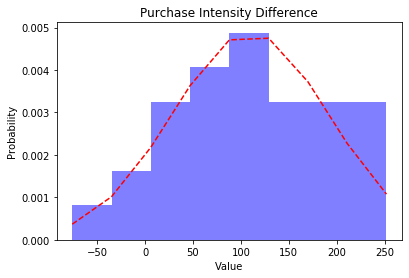

In [7]:
before = np.array([335,307,391,343,235,342,312,314,389,266,221,230,364,218,242,
                   373,299,258,300,371,370,240,229,248,217,380,364,306,320,302])
after = np.array([466,426,477,309,382,459,352,489,477,345,457,438,428,396,491,
                  398,460,325,389,396,476,307,481,461,407,304,383,308,436,458])

diff = after-before
mu = np.mean(diff) # mean of distribution
sigma = np.std(diff) # standard deviation of distribution

print('mean  =',mu)
print('stdev =',sigma)

n, bins, patches = plt.hist(diff, 8, facecolor='blue', alpha=0.5, density = True)

y = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title(r'Purchase Intensity Difference')
plt.subplots_adjust(left=0.1)
plt.show()

We learned that the mean difference is approximately 109.83 with 81.73 standart deviation. The distribution of the difference seems normal (the histogram and normal distribution plot is a fit).  

The **paired t-test** can be used to determine whether the mean difference between two sets of observations is zero. The paired sample t-test has two competing hypotheses, the **null hypothesis** $(H_0)$ and the **alternative hypothesis** $(H_1)$. 

\begin{align*}
    \text{Null Hypothesis}&: \text{ There is no change on average in purchase intensity before and after campaign}.\\
    \text{Alternative Hypothesis}&: \text{ There is an average change in purchase intensity before and after campaign}.
\end{align*}

The hypothesis can be formulated mathematically as follow:

\begin{align*}
    H_0 &: \mu_d = 0 \\
    H_1 &: \mu_d \neq 0. \\
    \text{Point Estimate}&: \bar{d} \text{ (the sample mean difference)}.
\end{align*}

Note that $\mu$ (mu) is usually used as a symbol for mean. We reject the $H_0$ if p-value$<\alpha$. We don't need to compute the p-value manually, let the program compute it for us.

In [8]:
(t,pvalue) = stats.ttest_rel(before,after)
print('  t    =',t)
print('pvalue =',pvalue)

  t    = -7.236155869178586
pvalue = 5.739867434881551e-08


We have the value of $t\approx -7.2361$ and p-value$\approx 0.000000057$. Since p-value$<\alpha=0.05$, we reject $H_0$ and state that there is an average change in purchase intensity before and after campaign. 

## Answer for Question No. 12

A Confidence Interval is a range of values we are fairly sure our true value lies in. The 95% confidence interval for this problem is:

In [9]:
cm = sms.CompareMeans(sms.DescrStatsW(after), sms.DescrStatsW(before))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (79.02956478904433, 140.63710187762229)


We know the mean difference is approximately 109.83 and there is an average change in purchase intensity before and after campaign. The problem is we don't know how much is the increase in purchase intensity in the population.
The 95% confindence interval (79.02, 140.63) guarantee that the increase in purchase intensity lies between 79.02 and 140.63 with 95% probability of true.

## Answer for Question No. 13

There is an increase in purchase intensity before and after the campaign. Let's do the campaign again.

# Question for No. 14-15

Feature 1:

| Day                  | 1      | 2      | 3      | 4      | 5       | 6       | 7       | 8       | 9       | 10      | 11      | 12      | 13      | 14      |
|----------------------|--------|--------|--------|--------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| Download             | 1.000  | 1.500  | 1.500  | 1.000  | 5.000   | 2.500   | 1.500   | 1.000   | 10.000  | 2.500   | 1.500   | 1.500   | 1.000   | 1.000   |
| Marketing cost (USD) | -      | -      | -      | -      | 1.000   | -       | -       | -       | 4.000   | -       | -       | -       | -       | -       |
| DAU                  | 1.000  | 1.950  | 2.200  | 1.750  | 5.500   | 4.750   | 2.600   | 1.500   | 10.500  | 2.750   | 1.750   | 1.600   | 2.500   | 1.900   |
| Revenue (USD)        | 40.000 | 75.000 | 85.000 | 70.000 | 220.000 | 190.000 | 100.000 | 60.000  | 420.000 | 110.000 | 70.000  | 60.000  | 100.000 | 75.000  |



Feature 2:

| Day                  | 1      | 2      | 3      | 4      | 5       | 6       | 7       | 8       | 9       | 10      | 11      | 12      | 13      | 14      |
|----------------------|--------|--------|--------|--------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| Download             | 1.500  | 1.500  | 1.500  | 1.500  | 1.500   | 1.500   | 1.500   | 1.500   | 1.500   | 1.500   | 1.500   | 1.500   | 1.500   | 1.500   |
| Marketing cost (USD) | -      | -      | -      | -      | -       | -       | -       | -       | -       | -       | -       | -       | -       | -       |
| DAU                  | 1.000  | 1.750  | 1.800  | 1.850  | 1.900   | 2.000   | 2.050   | 2.100   | 2.150   | 2.200   | 2.250   | 2.300   | 2.350   | 2.400   |
| Revenue (USD)        | 50.000 | 85.000 | 90.000 | 95.000 | 95.000  | 100.000 | 100.000 | 105.000 | 110.000 | 110.000 | 115.000 | 115.000 | 120.000 | 120.000 |



Feature 3:

| Day                  | 1      | 2      | 3      | 4      | 5       | 6       | 7       | 8       | 9       | 10      | 11      | 12      | 13      | 14      |
|----------------------|--------|--------|--------|--------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| Download             | 1.500  | 1.500  | 1.500  | 1.500  | 1.500   | 1.500   | 25.000  | 12.500  | 7.500   | 5.000   | 3.500   | 3.000   | 2.500   | 1.500   |
| Marketing cost (USD) | -      | -      | -      | -      | -       | -       | 20.000  | -       | -       | -       | -       | -       | -       | -       |
| DAU                  | 1.000  | 1.900  | 2.300  | 2.450  | 2.500   | 2.600   | 26.000  | 23.000  | 17.000  | 14.000  | 11.000  | 9.000   | 7.000   | 5.500   |
| Revenue (USD)        | 30.000 | 60.000 | 70.000 | 75.000 | 80.000  | 80.000  | 800.000 | 700.000 | 510.000 | 420.000 | 330.000 | 270.000 | 210.000 | 165.000 |


14. From that numbers, give your comments to performance for each feature!												
15. If you have to choose one from three feature to be develop further, which one that you choose and why?					

Before we answer those question, we will do some cleaning and analysis.  

## Data Cleaning and Analysis

We will transform those raw data into Pandas DataFrame. We make the DataFrame tidy by making a `feature` column to group the data. Delete the period on any integers. Null values on Marketing Cost is replaced with 0 because no marketing means zero cost.

In [10]:
# Input data
DATA = pd.DataFrame(data={
    'feature': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                3,3,3,3,3,3,3,3,3,3,3,3,3,3],
    'day': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'download': [1000,1500,1500,1000,5000,2500,1500,1000,10000,2500,1500,1500,1000,1000,
                 1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,
                 1500,1500,1500,1500,1500,1500,25000,12500,7500,5000,3500,3000,2500,1500],
    'marketing': [0,0,0,0,1000,0,0,0,4000,0,0,0,0,0,
                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                  0,0,0,0,0,0,20000,0,0,0,0,0,0,0],
    'dau': [1000,1950,2200,1750,5500,4750,2600,1500,10500,2750,1750,1600,2500,1900,
            1000,1750,1800,1850,1900,2000,2050,2100,2150,2200,2250,2300,2350,2400,
            1000,1900,2300,2450,2500,2600,26000,23000,17000,14000,11000,9000,7000,5500],
    'revenue': [40000,75000,85000,70000,220000,190000,100000,60000,420000,110000,70000,60000,100000,75000,
                50000,85000,90000,95000,95000,100000,100000,105000,110000,110000,115000,115000,120000,120000,
                30000,60000,70000,75000,80000,80000,800000,700000,510000,420000,330000,270000,210000,165000]
})
DATA

,feature,day,download,marketing,dau,revenue
0,1,1,1000,0,1000,40000
1,1,2,1500,0,1950,75000
2,1,3,1500,0,2200,85000
3,1,4,1000,0,1750,70000
4,1,5,5000,1000,5500,220000
5,1,6,2500,0,4750,190000
6,1,7,1500,0,2600,100000
7,1,8,1000,0,1500,60000
8,1,9,10000,4000,10500,420000
9,1,10,2500,0,2750,110000


Next we will look into the correlation between all columns on the DataFrame. We use correlation matrix and apply heatmap on it.

In [11]:
corr= DATA.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature,day,download,marketing,dau,revenue
feature,1,0,0.26,0.14,0.43,0.37
day,0,1,0.049,-0.012,0.2,0.21
download,0.26,0.049,1,0.87,0.89,0.91
marketing,0.14,-0.012,0.87,1,0.61,0.63
dau,0.43,0.2,0.89,0.61,1,0.99
revenue,0.37,0.21,0.91,0.63,0.99,1


The correlation coefficient always fall between -1 and 1. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related. 

We will focus on the red colored (high correlation) entries except the 1's in the diagonal. The `dau` and `revenue` have a very high correlation, that is 0.99. The next pair is `download & revenue`, `download & dau`, and `download & marketing`. 

The 0.99 correlation between `dau` and `revenue` is not surprising because the revenue came from active users. We plot some columns to see the relationship in detail.

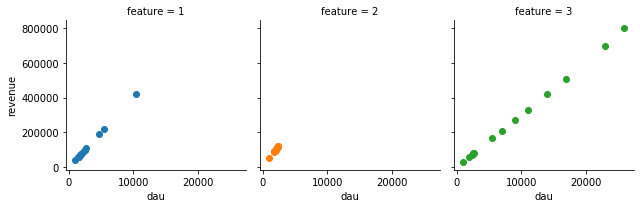

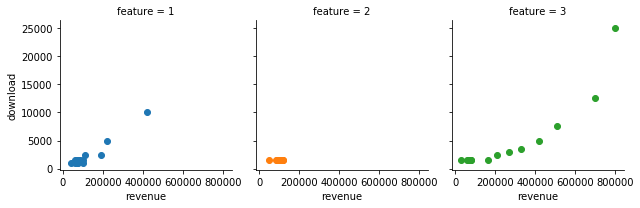

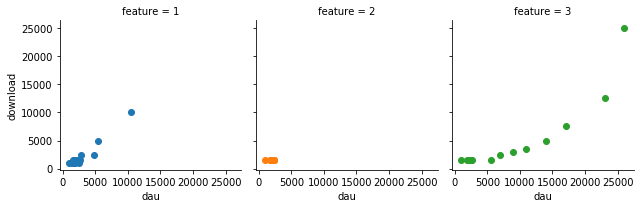

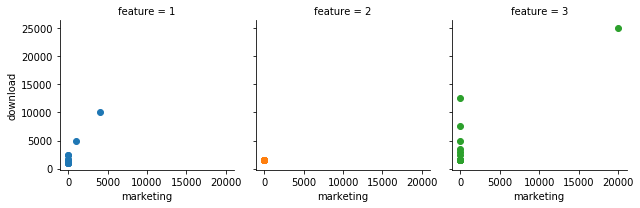

In [12]:
g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(plt.scatter, 'dau', 'revenue');

g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(plt.scatter, 'revenue', 'download');

g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(plt.scatter, 'dau', 'download');

g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(plt.scatter, 'marketing', 'download');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


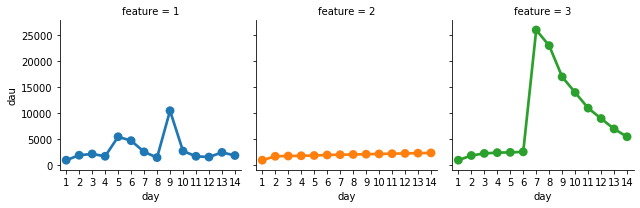

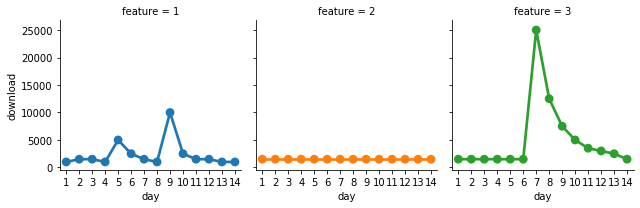

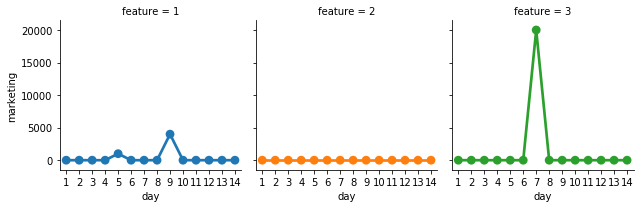

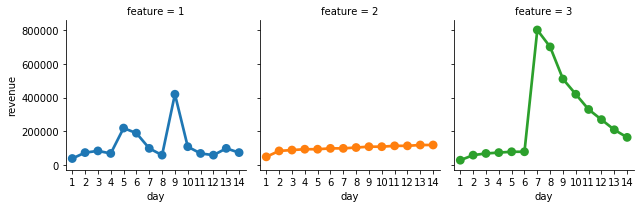

In [13]:
g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(sns.pointplot, 'day', 'dau');

g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(sns.pointplot, 'day', 'download');

g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(sns.pointplot, 'day', 'marketing');

g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(sns.pointplot, 'day', 'revenue');

From those chart, we can see more clearly about the `revenue` and `dau` information.  

Bigger marketing cost means bigger download count (and consequently active users too). Sadly after the marketing end we get download and DAU drop. Download drop is expected, but DAU drop is a problem. Some user find our product not suitable for them as they only tried it in a day. Next we will see how much revenue per user from each features.

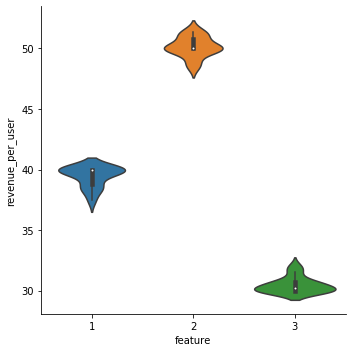

In [14]:
DATA['revenue_per_user'] = DATA['revenue']/DATA['dau']
sns.catplot(x='feature', y='revenue_per_user',data=DATA, kind='violin')

Feature 3 have the highest number of daily active user, but the revenue from each user is only 30 which is the lowest. 
On the contrary, feature 1 have the highest revenue per user, that is 50. 

We can conclude that marketing will give a huge boost in download and dau count. The problem is the revenue is not increased much the active users.

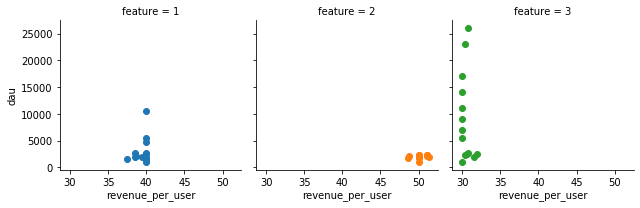

In [15]:
g = sns.FacetGrid(DATA, col='feature', hue='feature')
g.map(plt.scatter, 'revenue_per_user', 'dau');

Next we will see the ratio of active users and total download on 3 features.

In [16]:
def f_cum_data(data):
    data=list(data)
    cum_data=[data[0]]
    for i in range(1,len(data)):
        cum_data.append(cum_data[i-1]+data[i])
    return cum_data
cum_download=[]
cum_download.append(f_cum_data(DATA.groupby('feature').get_group(1)['download']))
cum_download.append(f_cum_data(DATA.groupby('feature').get_group(2)['download']))
cum_download.append(f_cum_data(DATA.groupby('feature').get_group(3)['download']))

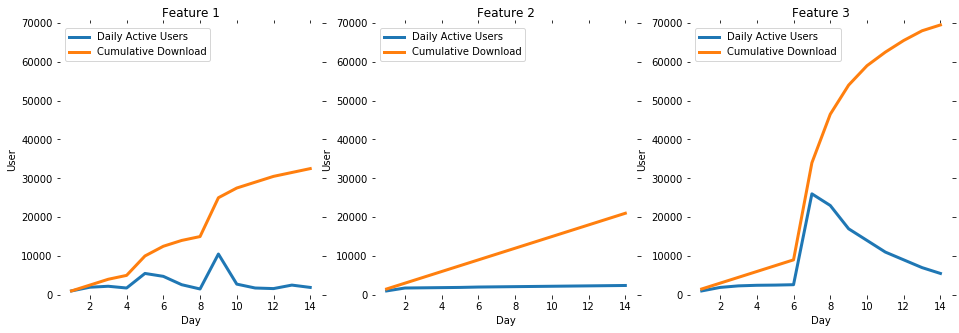

In [17]:
fig = plt.figure(figsize=(16,5))
for sp in range(0,3):
    ax = fig.add_subplot(1,3,sp+1)
    ax.plot(DATA['day'][0:14], DATA['dau'][14*sp:14*(sp+1)], label='Daily Active Users', linewidth=3)
    ax.plot(DATA['day'][0:14], cum_download[sp], label='Cumulative Download', linewidth=3)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    position = ["right","left","top","bottom"]
    for pos in position:
        ax.spines[pos].set_visible(False)
    ax.legend(loc='upper left')
    ax.set_ylim((0, 70000))
    ax.set_xlabel('Day')
    ax.set_ylabel('User')
    ax.set_title('Feature '+str(sp+1))
plt.show()

We calculate the percentage of daily active users compared to the cumulative download and plot the result.

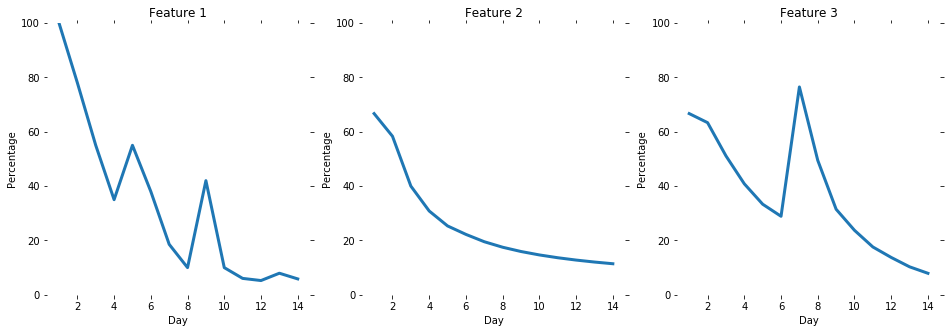

In [18]:
dau_percentage = []
fig = plt.figure(figsize=(16,5))
for sp in range(0,3):
    dau_percentage.append(100*DATA['dau'][14*sp:14*(sp+1)]/cum_download[sp])
    ax = fig.add_subplot(1,3,sp+1)
    ax.plot(DATA['day'][0:14], dau_percentage[sp], linewidth=3)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    position = ["right","left","top","bottom"]
    for pos in position:
        ax.spines[pos].set_visible(False)
    # ax.legend(loc='upper left')
    ax.set_ylim((0, 100))
    ax.set_xlabel('Day')
    ax.set_ylabel('Percentage')
    ax.set_title('Feature '+str(sp+1))
plt.show()

## Answer for Question No. 14
From those analysis, we conclude:

1. There is a very high positive correlation between daily active users and revenue. The higher the number of active users, the higher the revenue.
2. Marketing will give a boost on download count. The higher money you spent on marketing, the higher download you get. But the percentage of active user compared to the cumulative download is not increased.
3. Feature 2 have the highest revenue per user, that is 50. Followed by feature 1 with 40 revenue per user and feature 3 with 30 revenue per user. Feature 1 and 3 get bigger download and DAU counts but the revenue gained is still low.
4. There is a drop after each marketing. The drop continues until it reach the normal value (the same as before the marketing). It can be analyzed if there are more time available.

## Answer for Question No. 15
To answer this question, we will count the highest total revenue.

In [19]:
DATA.groupby('feature').agg('sum')[['download','marketing','revenue']]

,download,marketing,revenue
feature,,,
1,32500,5000,1675000
2,21000,0,1410000
3,69500,20000,3800000


The total revenue for Feature 3 is the highest with only 20.000 marketing cost. Feature 3 also have the highest downoad count. Feature 3 is not our choice yet because we only have 14 days in our data. We saw that the the `DAU` of feature 1 is getting stable, feature 2 is raising steadily, and feature 3 is dropping drastically. Remember that the DAU and revenue is highly related. 
We can do linear regression for feature 1 and 2, and piecewise regression for feature 3. The `dau` will be about the same sometime. The point is, the marketing failed to get loyal costumer. 


Because there is no information about what this business is. We compared it to mobile gaming regardless. Mobile game companies have started using ads that falsely portray the gameplay of their app. The ad would directly generate app installs. Some of these installs will convert to revenue-generating users (whether through in-app purchases or ads). But this method has some drawback too. Creating a growing group of users that speaks negatively about your brand all over the internet and on your app store page will hurt conversion rates. You can read more about fake ads on mobile gaming from the link below. 

Source: <https://www.storemaven.com/mobile-gaming-companies-fake-ads/>


Personally, I hate those fake ads. I left bad ratings on those games and delete it in 1 day only, like the cases on feature 1 and 3. I believe trust is one of the most important aspect in marketing. So **I choose feature 2**, steady but sure. Marketing is necerasy but I prefer the one which give more loyal costumer (more DAU) rather than sudden download boost.
    
> "There's no such thing as an overnight success." - *Cindy Margolis*

# Question for 16 - 17
Funnel from App ABC end 2019 - 2020

|                                          | Oct-19  | Nov-19  | Dec-19  | Jan-20  | Feb-20  | Mar-20  |
|:-----------------------------------------|---------|---------|---------|---------|---------|---------|
| Total Users who Landed at Landing Page   | 1,200,722 | 1,728,389 | 1,660,882 | 1,207,867 | 1,604,890 | 1,375,024 |
| Total Users who Register                 | 896,098 | 812,320 | 634,726 | 872,495 | 901,414 | 660,941 |
| Total Users who Search for products      | 566,628 | 520,108 | 565,090 | 573,030 | 523,221 | 506,372 |
| Total Users who View Product Detail Page | 493,040 | 495,317 | 487,816 | 458,428 | 466,800 | 421,844 |
| Total Users who Booking                  | 240,706 | 229,569 | 271,217 | 275,974 | 253,896 | 211,999 |
| Total Users who Paid                     | 114,583 | 140,283 | 149,696 | 108,782 | 111,713 | 123,059 |

16. What do they need to improve from the app? Please documents as much as hypothesis and thought process as possible!
17. from the funnel data above, CEO from ABC app need our help to formulate strategy to maximize number of customers who transact in the platform. How you achieve that goal, please documents as much as thought process as possible!

## Data Analysis

We will analyze the data first. Transform those data into pandas DataFrame.

In [20]:
ABC = pd.DataFrame({
    'date': ['Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20'],
    'landed': [1200722,1728389,1660882,1207867,1604890,1375024],
    'register': [896098,812320,634726,872495,901414,660941],
    'search': [566628,520108,565090,573030,523221,506372],
    'view_detail': [493040,495317,487816,458428,466800,421844],
    'booking': [240706,229569,271217,275974,253896,211999],
    'paid': [114583,140283,149696,108782,111713,123059]
})
ABC

,date,landed,register,search,view_detail,booking,paid
0,Oct-19,1200722,896098,566628,493040,240706,114583
1,Nov-19,1728389,812320,520108,495317,229569,140283
2,Dec-19,1660882,634726,565090,487816,271217,149696
3,Jan-20,1207867,872495,573030,458428,275974,108782
4,Feb-20,1604890,901414,523221,466800,253896,111713
5,Mar-20,1375024,660941,506372,421844,211999,123059


Plot the value of all those columns with column `date` as x-axis.

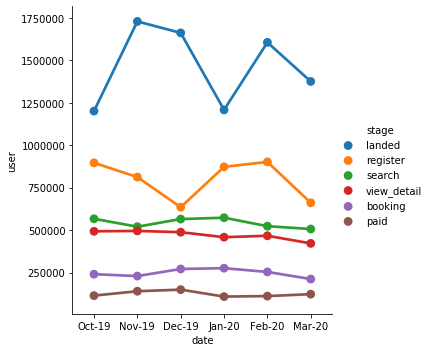

In [21]:
ABC_melt = ABC.melt('date', var_name='stage', value_name='user')
g = sns.catplot(x="date", y="user", hue='stage', kind='point', data=ABC_melt)

It is clear that the value of `landed` is higher than `register` and so on. We are interested to calculate and find the precentage of the difference instead. We will calculate the difference between `register` and `landed` and assign it into `landed_to_register` column. That column will be called a stage. We do that to all of the columns.

In [22]:
ABC_diff = pd.DataFrame()
ABC_diff['landed_to_register'] = ABC['landed'] - ABC['register']
ABC_diff['register_to_search'] = ABC['register'] - ABC['search']
ABC_diff['search_to_view_detail'] = ABC['search'] - ABC['view_detail']
ABC_diff['view_detail_to_booking'] = ABC['view_detail'] - ABC['booking']
ABC_diff['booking_to_paid'] = ABC['booking'] - ABC['paid']
ABC_diff['paid_to_finished'] = ABC['paid']
ABC_diff

,landed_to_register,register_to_search,search_to_view_detail,view_detail_to_booking,booking_to_paid,paid_to_finished
0,304624,329470,73588,252334,126123,114583
1,916069,292212,24791,265748,89286,140283
2,1026156,69636,77274,216599,121521,149696
3,335372,299465,114602,182454,167192,108782
4,703476,378193,56421,212904,142183,111713
5,714083,154569,84528,209845,88940,123059


Next we will make a stacked bar plot using the percentage of the above table

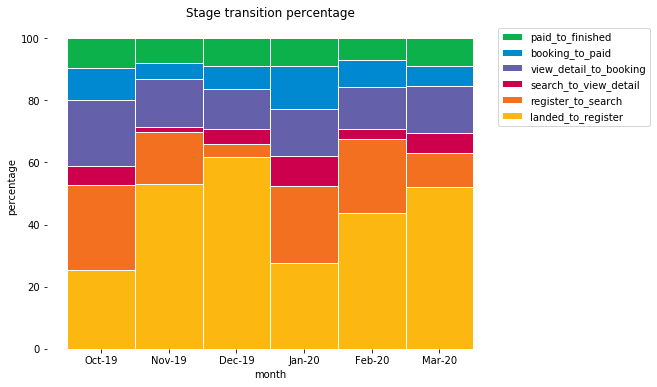

In [23]:
x = ABC['date']
total = ABC['landed']
barWidth = 1
names = ABC_diff.columns

# cmap = plt.get_cmap('Set2')
# colors = [cmap(i) for i in np.linspace(0, 1, 6)]

colors = ['#FCB711','#F37021','#CC004C','#6460AA','#0089D0','#0DB14B']

# Count percentage, name the col as bar
bar=[]
bar.append(100*ABC_diff['landed_to_register']/total)
bar.append(100*ABC_diff['register_to_search']/total)
bar.append(100*ABC_diff['search_to_view_detail']/total)
bar.append(100*ABC_diff['view_detail_to_booking']/total)
bar.append(100*ABC_diff['booking_to_paid']/total)
bar.append(100*ABC_diff['paid_to_finished']/total)

# bar length
bar_length = [bar[0]]
for i in range(5):
    bar_length.append(bar_length[i]+bar[i+1])

# plot (reversed to make the legend reversed)
# The first bar don't need to add bottom (it is the bottom)
fig, ax = plt.subplots(figsize=(8,6))
for i in reversed(range(1,6)):
    ax.bar(x, bar[i], edgecolor='white', width=barWidth, bottom=bar_length[i-1], label=names[i], color=colors[i])
ax.bar(x, bar[0], edgecolor='white', width=barWidth, label=names[0], color=colors[0])

# Add axis
#ax.set_xticks(x)
ax.set_xlabel('month')
ax.set_ylabel('percentage')
ax.set_title('Stage transition percentage')
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Hide spines
position = ["right","left","top","bottom"]
for pos in position:
    ax.spines[pos].set_visible(False)

# Show graphic
plt.show()

The percentage is also presented in a table with heatmap applied.

In [24]:
ABC_Percentage = pd.DataFrame(bar)
ABC_Percentage.columns = ABC['date']
ABC_Percentage.index = ['landed_to_register','register_to_search','search_to_view_detail',
                        'view_detail_to_booking','booking_to_paid','paid_to_finished']
ABC_Percentage.index.name = 'Stage_Transition'
ABC_Percentage.style.background_gradient(cmap='Greys')
# White to black is the easiest ordering for our eyes

date,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
Stage_Transition,,,,,,
landed_to_register,25.3701,53.0013,61.7838,27.7656,43.8333,51.9324
register_to_search,27.4393,16.9066,4.19271,24.7929,23.565,11.2412
search_to_view_detail,6.12865,1.43434,4.65259,9.48797,3.51557,6.14738
view_detail_to_booking,21.0152,15.3755,13.0412,15.1055,13.266,15.2612
booking_to_paid,10.5039,5.16585,7.31665,13.8419,8.85936,6.46825
paid_to_finished,9.54284,8.1164,9.01304,9.00612,6.96079,8.94959


Now we are ready to answer the question.

## Answer for Question No. 16
Before we list some point for improvement, we will point some good news from this app.
- The `search_to_detail` stage is the thinnest on the bar plot. It is nice, the majority of the user find what they are searching for.
- The `booking_to_paid` is also thin. It means most user find the price acceptable.

Now about the improvement, we list some point that could be done.
- First is the thickest bar on the plot, the `landed_to_register`. It's not hard to understand, most people didn't like registering for a new app they just tried. More than half of the user didn't register so they don't tried to search any product or view anything the app has to offer. Registration can be done later when the user want to book, maybe it will reduce the `landed_to_register` and raise the `search` and `view_detail` counts. 
- The second thickest bar is the `register_to_search`. It is strange that user do the registration and didn't do any search at all. The assumption is he/she didn't skip to view_detail.
- Next is the `view_detail_to_booking` stage. There are dozen or more user view the detail but didn't proceed to the booking. There is nothing to do with the app to make the users like the product. Posting fake detail may give a bad rating to the app.
- The last is about the high value of landed on December 2019. There is a Christmas and New Year holiday, so the traffic for hotels is significantly increased. The problem is more than 60% of them didn't register and the percentage of `paid` is stable at 9%.


## Answer for Question No. 17

Regarding those point for improvement, we can do something real to maximize the transaction.
- We already have a huge traffic but only 9% of them actually made transaction. The registration can be done later, merged with booking. That make anyone who visited our app can browse our product right away. 
- There is a high traffic on some occasion. We can predict when it will happend to give visitors some gimmick so they are interested to check our product and hopefully made transactions.

# Question for No. 18-20

"XYZ is a discovery platform where people can find culinary inspiration and get comprehensive information about the restaurants to be visited. On the platform, each user can interact by giving reviews and getting a more objective picture of the restaurant from other users.

The main feature from the product was:
- visitors can get comprehensive information from the restaurant from menu, ambience, location, price and reviews.
- all visitors can give the honest review about the restaurant that they visited
- visitors can search for deals available from those restaurant and purchase directly through the app
- visitors can read the article about culinary experience from different regions in Indonesia."	

18. Management want to launch that platform, which KPI (key performance index) that management need to tracks and monitor to define success of that business? Why you choose that metric to be important aspects to monitor?								
19. Hows your strategy to get those data? What method and platform that you will be use ?								
20. Based on your observation, what type of users in that platforms? How you segment those users? 	

## Answer for Question No. 18

List of KPI to track and monitor:

- `Deals availability`. The more deals available each day, the more users will attracted to purchase food through the app.
- `Frequency of restaurant's sale`. To see that the restaurant will keep using the app.
- `Frequency of user's review`. To see that the user actively using the app.
- `Frequency of user's purchase`. More purchase from the app means more valuable the app to the restaurants and users.
- `Number of active users per day`. To check that the app is still being used.
- `Number of restaurant seen`. To check the popularity of the restaurant.
- `Number of new articles per day`. A good platform need to have updated articles. 
- `Number of new restaurants per day`. There are new restaurants every month in Indonesia. The app need to get up-to-date.
- `Number of new reviews per day`. To check whether the user still giving reviews everyday.
- `Number of new users registration per day`. More new users means more costumer for the restaurant.
- `Number of users view on restaurant`. To check the activity of the users.
- `Brand awareness`. The app need to be known publicly to get more users and restaurants.
- `App download count`. The visitor of the app is not always a user. We need to know the number of download and visitor too.

## Answer for Question No. 19

- `Deals availability`. The deals must be stored in a database. We can get those data by using SQL Query.
- `Frequency of restaurant's sale`. Same as above.
- `Frequency of user's review`. Same as above.
- `Frequency of user's purchase`. Same as above.
- `Number of active users per day`. Same as above.
- `Number of restaurant seen`. Same as above. Put an event listener on click or something like that
- `Number of new articles per day`. Same as above.
- `Number of new restaurants per day`. Same as above.
- `Number of new reviews per day`. Same as above.
- `Number of new users registration per day`. Same as above.
- `Number of users view on restaurant`. Same as above. Put an event listener on click or something like that
- `Brand awareness`. Can be obtained from the platform's social media account. There are many tools to do that.
- `App download`. Can be obtained from the platform that provide the app.

## Answer for Question No. 20

- `Inactive users`. Users that no longer visit the app.
- `Free users`. Users that spent their time on the app mostly to check restaurants's menu, ambience, location, price and reviews. No actual contribution done to the platform.
- `Young users`. Using the app to find great restaurant, or maybe caffee for hangout. More review, less purchase.
- `Busy users`. Using the app to purchase food directly from the app. Less review, more purchase.
- `Travellers`. Using the app to give reviews on the visited restaurant. Using the app to find more restaurant out-of-town.

Sorry, I'm terrible at naming something.  

We can segmented those types by the number of reviews given, purchase intensity, restaurant seen, and visit rate. The following table is used to determine which type a user will be.

| Type | Inactive users | Free users | Young users | Busy users | Travellers |
|------|----------------|------------|-------------|------------|------------|
| Reviews given | any | none | medium | medium | high |
| Purchase intensity | any | none | low | high | low |
| Restaurant seen | any | medium | medium | low | high |
| Visit rate | low | medium | high | high | high |

Note:
- any: any value in that factor is okay.
- none: no more data on that factor, or zero (depend on the system).
- low: can be determined based on the statistics of the data obtained.
- medium: can be determined based on the statistics of the data obtained.
- high: can be determined based on the statistics of the data obtained.